In [1]:
library(Seurat)
library(ggplot2)
library(cowplot)


Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave



In [2]:
figure_width  =  8
figure_height = 6
options(repr.plot.width = figure_width, repr.plot.height = figure_height)

In [3]:
facs_annotation = read.csv("../data/annotations_facs.csv") # downloaded this file from https://github.com/czbiohub/tabula-muris/tree/master/00_data_ingest/18_global_annotation_csv

# Color palettes

In [4]:
liver_celltypes_human <- data.frame(celltypes = c("abT_cell", "central_venous_sinusoidal_endothelial_cells", "Cholangiocytes", "gdT_cell", "Hepatic_Stellate_Cells",
                                                  "Hepatocytes0", "Hepatocytes1", "Hepatocytes3", "Hepatocytes4", "inflammatory_macrophages", "Kupffer_cell", "Mature_B_cells",
                                                  "NK.NKT_cell", "Periportal_sinusoidal_endothelial_cells", "Plasma_cell"),
                                   colors     = c("#db4e00", "#00c2c0", "#0a9d06", "#fa9c00", "#9ed242", "#b53bc7", "#641f52", "#f1a8f2", "#ff4bcc", "#cdad02",
                                                 "#f0d710", "#f77841", "#ff8e77", "#0075da", "#a00621"))

liver_celltypes_mouse <- data.frame(celltypes = c("B_cell", "endothelial_cell_of_hepatic_sinusoid", "hepatocyte", "Kupffer_cell", "natural_killer_cell"),
                                   colors  = c("#f77841", "#00c2c0", "#b53bc7", "#f0d710", "#ff8e77"))

# Load seurat objs

In [9]:
human_liver = load(file="../data/Robjs/human_liver_seurat.Robj")
human_liver = tiss

In [5]:
mouse_liver = load(file="../data/Robjs/facs_Liver_seurat_tiss.robj") # downloaded from https://figshare.com/articles/Robject_files_for_tissues_processed_by_Seurat/5821263/1
mouse_liver = tiss

# Reannotate mouse cells using standardized ontologies

In [6]:
ReannotateMeta <- function(tiss){
    
    reann.df = facs_annotation[, c("cell", "cell_ontology_class")]
    tiss@meta.data$cell <- rownames(tiss@meta.data)
    temp.meta = tiss@meta.data
    temp.meta = merge(temp.meta, reann.df)
    rownames(temp.meta) = temp.meta$cell
    tiss@meta.data = temp.meta
    
    return(tiss)

}

In [7]:
mouse_liver      = ReannotateMeta(mouse_liver)

# Updated Seurat to V3, so need to update objs

In [8]:
mouse_liver = UpdateSeuratObject(mouse_liver) #Provided Robjs are from Seurat V2

Validating object structure
Ensuring keys are in the proper strucutre
Ensuring feature names don't have underscores
Object representation is consistent with the most current Seurat version


In [10]:
human_liver = UpdateSeuratObject(human_liver) 

Validating object structure
Ensuring keys are in the proper strucutre
Ensuring feature names don't have underscores
Object representation is consistent with the most current Seurat version


# Calculate UMAP for mouse
Tabula muris R objs included metadata with already calculated PCA and TSNE

In [11]:
mouse_liver <- RunUMAP(object = mouse_liver, reduction.use = "pca", dims = 1:7, min_dist = .8, seed = 10) #Number of PCs used based on PCElbowPlot(object = mouse_liver)

# Plot UMAP

In [12]:
PlotUMAPFrazer <- function(tiss, colors){
    
    DimPlot(tiss, reduction.use = "umap", label = TRUE, group.by = "cell_ontology_class", pt.size = 1.75, cols.use = colors) + NoLegend()
    
}

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”

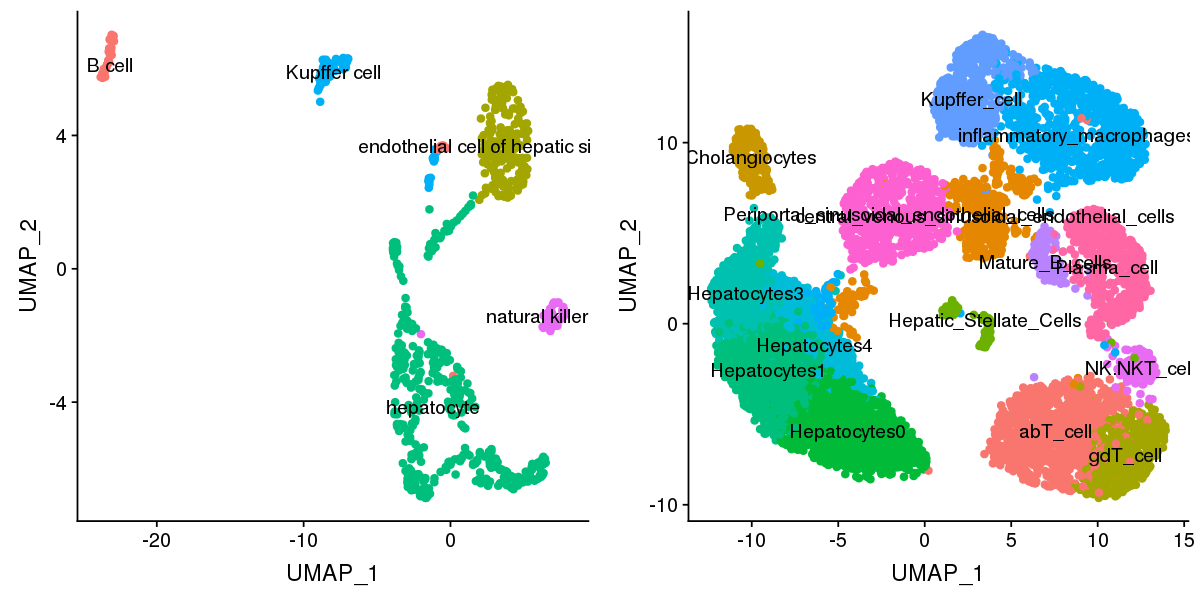

In [13]:
options(repr.plot.width = 10, repr.plot.height = 5)
p1 <- PlotUMAPFrazer(mouse_liver,      liver_celltypes_mouse$colors)
p2 <- PlotUMAPFrazer(human_liver,      liver_celltypes_human$colors)
plot_grid(p1, p2)

# Bar plots of cell counts per tiss

In [14]:
PlotBarplotFrazer <- function(tiss, colors){
    
    par(mar = c(10, 5, 2, 2))
    counts = as.data.frame(table(tiss@meta.data$cell_ontology_class))

    counts$fraction = (counts$Freq / sum(counts$Freq)) * 100
    counts = counts[order(counts$Var1),]
    counts$color <- colors
    counts = counts[order(counts$fraction),]

    barplot(counts$fraction, horiz = F, xlim = c(0, 60), names.arg = counts$Var1, las = 3, col = counts$color,
            border=NA, width = 3, ylab = "Fraction of cells")    
}

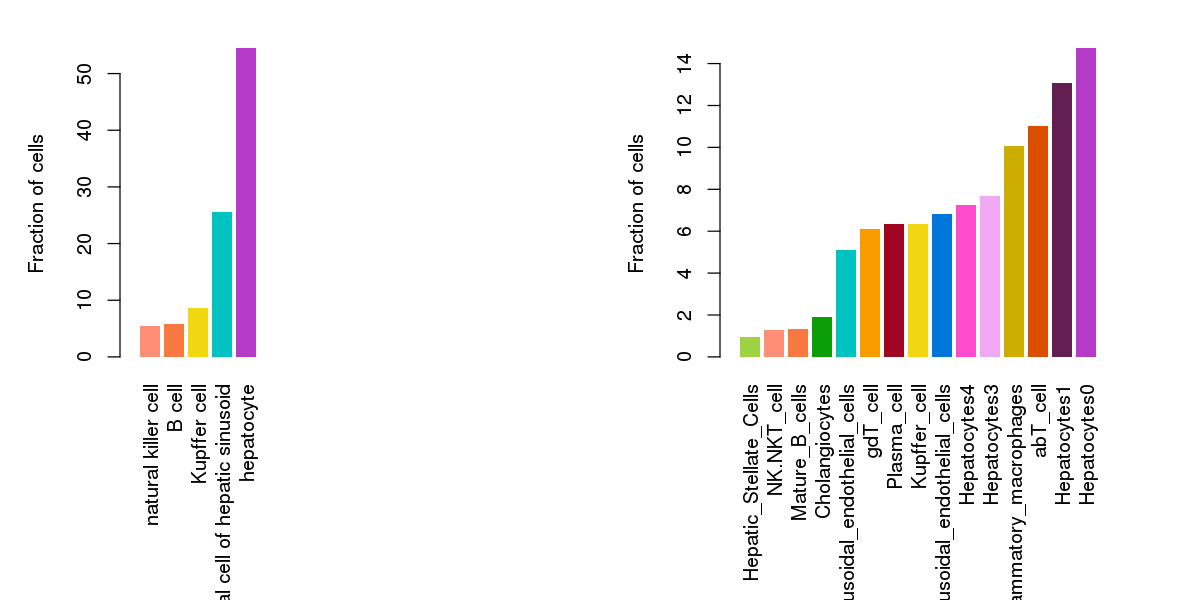

In [15]:
options(repr.plot.width = 10, repr.plot.height = 5)
par(mfrow = c(1,2))
PlotBarplotFrazer(mouse_liver,      liver_celltypes_mouse$colors)
PlotBarplotFrazer(human_liver,      liver_celltypes_human$colors)

In [16]:
tiss = mouse_liver
save(tiss, file = "../data/Robjs/mouse_liver_updatedSeurat.Robj")

In [17]:
tiss = human_liver
save(tiss, file = "../data/Robjs/human_liver_updatedSeurat.Robj")

In [34]:
sessionInfo()

R version 3.5.1 (2018-07-02)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS: /frazer01/home/matteo/software/R-3.5.1/lib/libRblas.so
LAPACK: /frazer01/home/matteo/software/R-3.5.1/lib/libRlapack.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] cowplot_0.9.4 ggplot2_3.2.0 Seurat_3.0.2 

loaded via a namespace (and not attached):
 [1] tsne_0.1-3          nlme_3.1-140        bitops_1.0-6       
 [4] RColorBrewer_1.1-2  httr_1.4.0          repr_1.0.1         
 [7] sctransform_0.2.0   tools_3.5.